# Burger's Equation
Here we solve the advection equation $u_t + u\ u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm.notebook import tqdm


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina

/home/sam/miniconda3/compiler_compat/ld: warning: libgfortran.so.5, needed by /usr/lib64/libblas.so, not found (try using -rpath or -rpath-link)
/home/sam/miniconda3/compiler_compat/ld: /tmp/tmp7q8rm6fn/tmp/tmp7q8rm6fn/source.o: in function `main':
source.c:(.text.startup+0x50): undefined reference to `cblas_ddot'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_stop_string@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_st_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_string_len_trim@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_transfer_character_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib64/libblas.so: undefined reference to `_gfortran_transfer_integer_write@GFORTRAN_8'
/home/sam/miniconda3/compiler_compat/ld: /usr/lib

SyntaxError: unterminated string literal (detected at line 1) (<string>, line 1)

In [2]:
#speed of the advection
a = 1.0

#domain
L = 10.0                    # length   
nx = 101                    # number of points
dx = L/(nx-1)               # spacing bw points
x = np.linspace(0, L, nx)   


cf = 0.5             # convergence factor
dt = cf*dx/a         # timestep
t_final = 20.0       # final time
n_i = t_final/dt

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=', n_i)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [3]:
def plot(x, u_current, name):
    ax.clear()
    ax.plot(x, u_current)
    
    ax.set_xlabel(f'$x$', c='w')
    ax.set_ylabel(f'$u(x, t)$', c='w')
    ax.set_ylim(0, 1.1)
    
    ax.set_title(f'{name} form upwind method, time = {round(t,1)}')

In [4]:
def non_conservative(frame):
    global u_current, t, l2norm, all_u
    
    #upwind method in non conservative form
    if (t < t_final):
        # roll -1 is j+1
        u_next =  u_current - u_current*dt/(dx)*(u_current - np.roll(u_current, 1))     
        u_previous = u_current.copy()
        u_current = u_next.copy()
        l2norm[frame] = np.sqrt(np.sum(u_current**2)/len(u_current))
        all_u[frame] = u_current
        
        plot(x, u_current, 'Non Conservative')
        t += dt

In [5]:
def conservative(frame):
    global u_current, t, l2norm, all_u
    
    #upwind method in conservative form
    if (t < t_final):
        # roll -1 is j+1
        u_next =  u_current - dt/(dx)*(0.5*u_current**2 - 0.5*np.roll(u_current, 1)**2)     
        u_previous = u_current.copy()
        u_current = u_next.copy()
        l2norm[frame] = np.sqrt(np.sum(u_current**2)/len(u_current))
        all_u[frame] = u_current
        
        plot(x, u_current, 'Conservative')
        t += dt

In [6]:
# Define the initial condition 
x0 = 5
u_initial = np.exp(-(x-x0)**2)      #gaussian centered in 5

# Initialize the solution array
u_current = u_initial.copy()
u_previous = np.exp(-((x + a*dt) -x0)**2) 

#initialize the norm array
l2norm = np.zeros(round(n_i))
all_u = np.zeros((round(n_i),len(x)))

  0%|          | 0/200 [00:00<?, ?it/s]

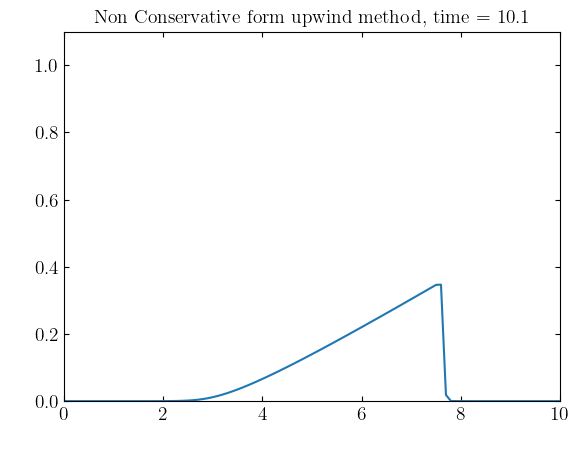

In [8]:
# SELECT METHOD #
h = ['Non conservative form', 'Conservative form']
t = 0.0

num_frames = int(t_final/dt) # We set the total number of iterations as the total number of frames
num_frames = 200

fig, ax = plt.subplots()
nc_ani = animation.FuncAnimation(fig, non_conservative, frames = tqdm(range(num_frames)), interval=1, repeat=True)
#c_ani = animation.FuncAnimation(fig, conservative, frames = tqdm(range(num_frames)), interval=1, repeat=True)


# Saving the Animation
writergif = animation.PillowWriter(fps=30)
nc_ani.save(r"nc.gif", writer=writergif)
#c_ani.save(r"c.gif", writer=writergif)

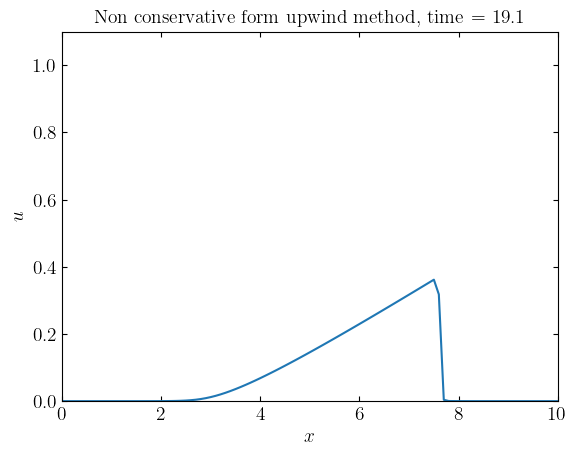

In [9]:
#you need to run the corresponding simulation first
I = 0

time = np.linspace(0, t_final, num_frames)
frame = 190
t_i = round(time[frame],2)

u_i = all_u[frame]
plt.plot(x, u_i)
plt.title(f'{h[I]} upwind method, time = {t_i}')
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.ylim(0, 1.1)

plt.savefig(f'images/{h[I]}_t={t_i}.png', dpi=300)

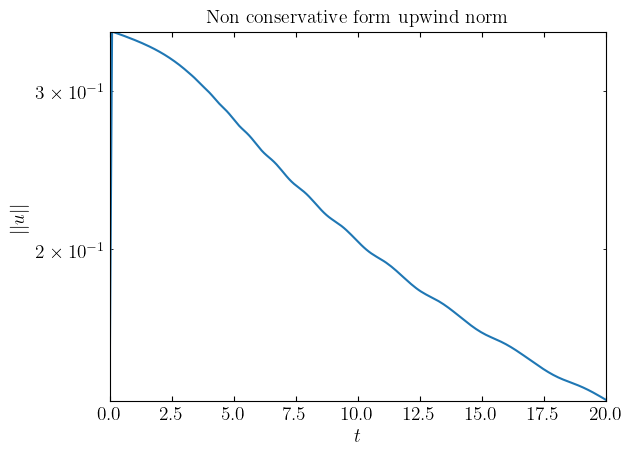

In [10]:
plt.plot(time, l2norm[:200])
plt.yscale('log')

plt.title(f'{h[I]} upwind norm')

plt.xlabel(r'$t$')
plt.ylabel(r'$||u||$')

plt.savefig("l2norm_nc" + ".png", dpi=300, bbox_inches='tight')
#plt.savefig("l2norm_c" + ".png", dpi=300, bbox_inches='tight')
plt.show()